# DZ - MLP

## Učitavanje podataka

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

# Učitavanje Iris dataseta
iris = load_iris()
X = iris.data[50:150, [0, 2]]  # Promatrati ćemo samo vrijednosti iz stupaca 0 i 2 za raspon redaka 50:150 skupa podataka
y = iris.target[50:150]
y = np.where(y == 2, 1, 0)  # Prilagodimo oznake za binarnu klasifikaciju

# Standardizacija
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [17]:
# Učitavajne u DataFrame
# df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df["target"] = pd.Series(iris.target)

In [ ]:
# Standardizirane vrijednosti
X_std

In [ ]:
# Orginalni ulaz
X

In [66]:
# Broj ulaza
X_std.shape[1]

2

## Zadatak

Za zadane podatke `X_std` i ciljane izlaze `y` definirajte model neuronske mreže sa proizvoljnim brojem potpuno povezanih (skrivenih) slojeva [Dense](https://keras.io/api/layers/core_layers/dense/) (s proizvoljnim brojem neurona) i proizvoljnim [aktivacijskim funkcijama](https://keras.io/api/layers/activations/#usage-of-activations) (**izuzev definiranog ulaznog i izlaznog sloja**). Također prilagodite stopu učenja (`learning_rate`), broj epoha te odaberite prikladan [optimizacijski algoritam](https://keras.io/api/optimizers/) (`optimizer`).

S modelom je potrebno ostvariti rezultat bolji od osnovnih (*baseline*) **90%** točnosti (*accuracy*).

---

>Bodovanje: (ostvareni_accuracy - 0.90) * 20 **od** **2**
>
>Preporuka: Koristite GPU (Runtime > Change runtime type > T4 GPU/TPU)

In [67]:
# Postavimo seed za ponovljivost rezultata
tf.keras.utils.set_random_seed(20)

# Definiranje modela
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer( # Definirani ulazni sloj (ne mijenjati)
            input_shape = (X_std.shape[1],),
            batch_size = 30
        ),
        tf.keras.layers.Dense( # Primjer definiranog skrivenog sloja (mijenjati)
            10,
            activation="relu",
        ),
        tf.keras.layers.Dense( # Definirani izlazni sloj (ne mijenjati)
            1,
            activation="sigmoid",
        ),
    ]
)

# Optimizacijski algoritam (mijenjati)
learning_rate = 0.01  # Definirajmo learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  # Define optimizer

# Komiliranje
model.compile(
    optimizer=optimizer,
    loss = "binary_crossentropy",
    metrics=['accuracy']
)

model.fit(
    X_std, y,
    epochs=10,
          )

Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 1.0405 - accuracy: 0.1800
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 1.0077 - accuracy: 0.1800
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9852 - accuracy: 0.1900
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.9657 - accuracy: 0.2200
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.9463 - accuracy: 0.2400
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.9275 - accuracy: 0.2400
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.9085 - accuracy: 0.2900
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 0.8941 - accuracy: 0.2900
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8794 - accuracy: 0.3000
Epoch 10/10
4/4 [==============================] - 0s 9ms/step - loss: 0.8643 - accuracy: 0.3200


In [68]:
# Prikaz konfiguracije modela
model.get_config()

{'name': 'sequential_15',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (30, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_16'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_65',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_66',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'c

In [ ]:
model.predict(X_std)

In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(X_std, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

4/4 [==============================] - 0s 4ms/step - loss: 0.8526 - accuracy: 0.3400
Accuracy: 34.00%


9600/9600 [==============================] - 15s 2ms/step


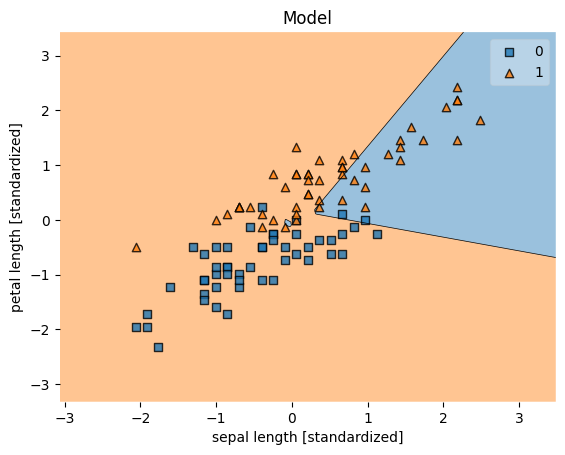

In [71]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_std, y, clf=model)
plt.title('Model')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

In [72]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (30, 10)                  30        
                                                                 
 dense_66 (Dense)            (30, 1)                   11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


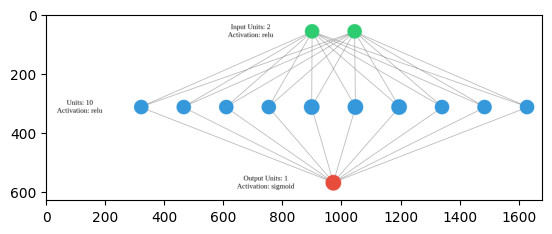

In [73]:
# Vizualizacija modela
!pip install keras-visualizer
from keras_visualizer import visualizer
import matplotlib.pyplot as plt

visualizer(model, file_name='image', file_format='png', view=True)
img = plt.imread('image.png')
plt.imshow(img)